# Assigment Python 3

**Sumber Data:** https://archive.ics.uci.edu/dataset/222/bank+marketing

# Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Input Variables:

### Data nasabah Bank
* Age (numeric): Usia
* Job: Jenis pekerjaan (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital: Status pernikahan (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
* Education: Pendidikan (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: Apakah kredit default? (categorical: 'no', 'yes', 'unknown')
* Housing: Apakah memiliki pinjaman rumah? (categorical: 'no', 'yes', 'unknown')
* Loan: Apakah memiliki pinjaman pribadi? (categorical: 'no', 'yes', 'unknown')

### Terkait dengan kontak terakhir kampanye saat ini:
* Contact: Jenis komunikasi kontak (categorical: 'cellular','telephone')
* Month: Kontak terakhir berdasarkan bulan dalam tahun (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* Day_of_week: Kontak terakhir berdasarkan hari dalam pekan (categorical: 'mon', 'tue', 'wed', 'thu','fri')
* Duration: Durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika duration=0 maka y='no'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

### Atribut lain:
* Campaign: Jumlah kontak yang dilakukan selama campaign dan untuk klien (numeric, includes last contact)
* Pdays: Jumlah hari yang berlalu setelah klien terakhir dihubungi dari campaign sebelumnya (numeric; 999 means client was not previously contacted)
* Previous: Jumlah kontak yang dilakukan sebelum campaign ini dan untuk klien ini (numeric)
* Poutcome: Hasil campaign dari pemasaran sebelumnya (categorical: 'failure', 'nonexistent', 'success')

### Atribut dengan konteks sosial dan ekonomi:
* Emp.var.rate: Tingkat variasi pekerjaan - indikator triwulanan/quarterly (numeric)
* Cons.price.idx: Indeks harga konsumen - indikator bulanan (numeric)
* Cons.conf.idx: Indeks kepercayaan konsumen - indikator bulanan (numeric)
* Euribor3m: Tarif euribor 3 bulan - indikator harian (numeric)
* Nr.employed: Jumlah karyawan - indikator triwulanan/quarterly (numeric)

### Output Variable (target yang diinginkan):
* Y: Apakah klien telah berlangganan deposito berjangka? (binary: 'yes', 'no')

# Import Libraries

Sebelum memulai, memanggil packages yang kiranya akan digunakanan saat proses analisis.

In [1]:
# proses data
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih Model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Analisis data
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


import scipy.stats
from scipy import stats
import scipy.stats as scistats
import statsmodels.api as sm
import math
import statistics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Processing

In [2]:
# Memanggil data
df = pd.read_csv("D:/Python for Data Science/bank+marketing/bank-additional/bank-additional/bank-additional-full.csv", sep=';')
data = pd.DataFrame(df)

In [3]:
# Menampilkan 5 data pertama
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Menampilkan jumlah baris dan kolom pada dataset menggunakan fungsi .shape
data.shape

(41188, 21)

Dapat diketahui bahwa data tersebut memiliki 41188 baris dan 21 kolom

In [5]:
# Melihat informasi tentang data mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari hasil di atas diketahui bahwa pada dataframe tipe data int64 sebanyak 5, object sebanyak 11, dan float64 sebanyak 5.

In [6]:
# Melihat kolom pada data
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# Mencari nilai unique pada data
for col in data.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*40)
    print(data[col].unique())
    print("="*40)

UNIQUE VALUES FOR  age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
UNIQUE VALUES FOR  job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
UNIQUE VALUES FOR  marital
['married' 'single' 'divorced' 'unknown']
UNIQUE VALUES FOR  education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
UNIQUE VALUES FOR  default
['no' 'unknown' 'yes']
UNIQUE VALUES FOR  housing
['no' 'yes' 'unknown']
UNIQUE VALUES FOR  loan
['no' 'yes' 'unknown']
UNIQUE VALUES FOR  contact
['telephone' 'cellular']
UNIQUE VALUES FOR  month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
UNIQUE VALUES FOR  day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
UNI

In [8]:
# Mengecek missing value
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dari hasil di atas dapat dilihat bahwa tidak terdapat adanya missing value.

In [9]:
# Mengecek duplikat pada data
data.duplicated().sum()

12

Dari hasil di atas terlihat bahwa terdapat data yang duplikat sebanyak 12.

In [10]:
# Menghilangkan data yang duplikat
data.drop_duplicates(inplace=True)

In [11]:
# Melihat data 'unknown' pada dataframe
data.isin(['unknown']).sum().sort_values(ascending=False)

default           8596
education         1730
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

Dari hasil di atas dapat diketahui bahwa terdapat data yang 'unknown'.

# Eksploarasi Data

In [12]:
#Membuat variabel kategori untuk  tipe data object dan boolean
kategori = data.select_dtypes(include=['object', 'bool']).columns.values

for col in kategori:
    print(col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


In [13]:
# Melihat jumlah data nasabah yang berlangganan deposio
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

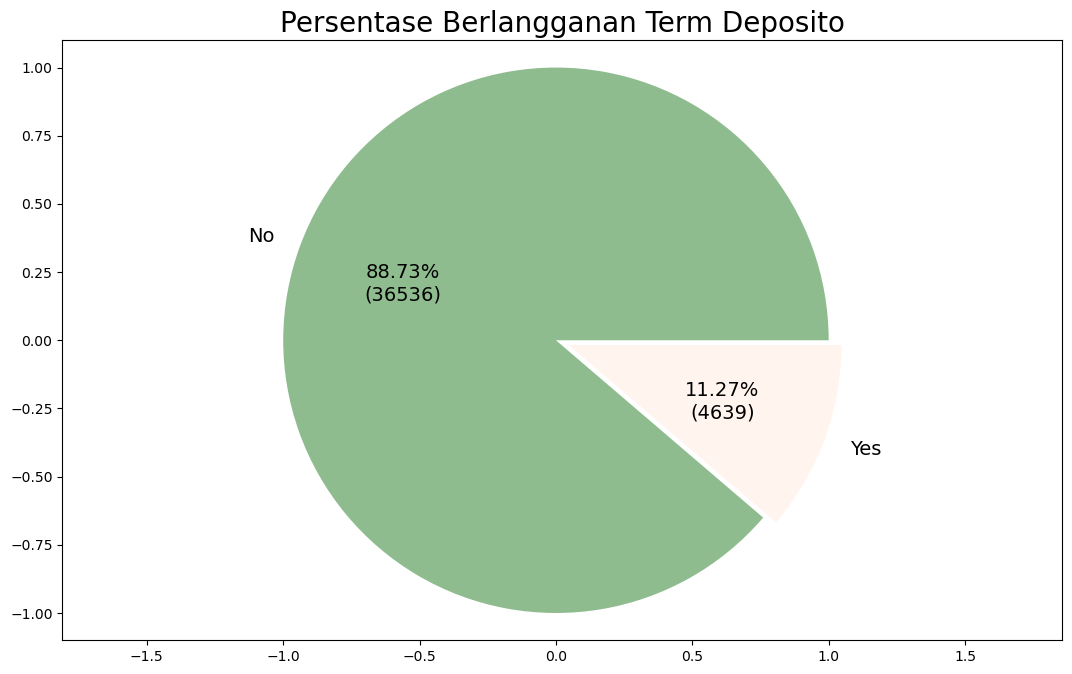

In [14]:
# Data
mylabels = ['No', 'Yes']
mycolors = ['darkseagreen', 'seashell']
explode = (0, 0.05)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

# Menghitung jumlah nasabah untuk setiap label
counts = data['y'].value_counts() 

# Fungsi untuk menambahkan label nilai di atas setiap batang
def autopct_format(pct):
    total = sum(counts)
    count = int(pct * total / 100.0)
    return f'{pct:.2f}%\n({count})'

# Membuat bar plot
ax.pie(counts, 
       labels=mylabels, 
       colors=mycolors, 
       explode=explode, 
       autopct=autopct_format, 
       frame=True, 
       textprops=dict(color="black", size=14))

ax.axis('equal')
plt.title('Persentase Berlangganan Term Deposito', color='black', fontsize=20)

plt.show()

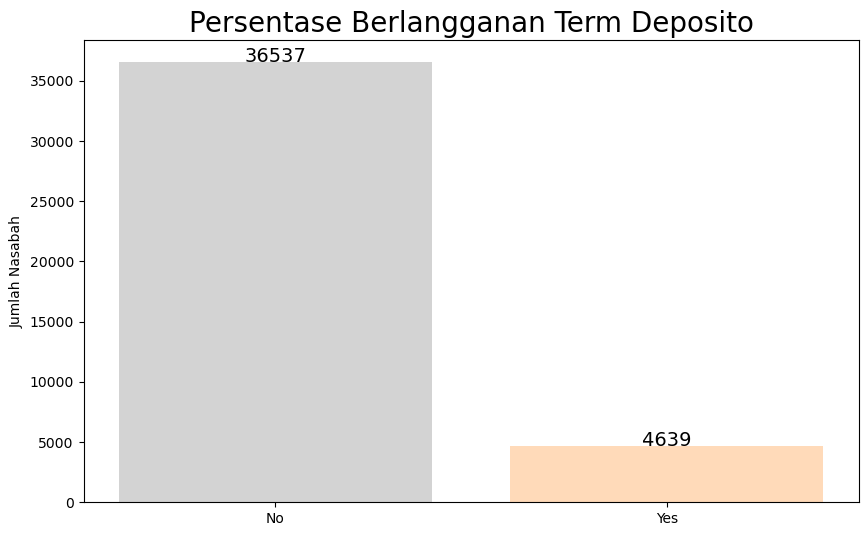

In [15]:
# Data
mylabels = ['No', 'Yes']
mycolors = ['lightgrey', 'peachpuff']
fig, ax = plt.subplots(figsize=(10, 6))

# Menghitung jumlah nasabah untuk setiap label
counts = data['y'].value_counts()

# Fungsi untuk menambahkan label nilai di atas setiap batang
def add_value_labels(ax, spacing=5):
    for i, count in enumerate(counts):
        ax.text(i, count + spacing, f'{count}', ha='center', size=14)

# Membuat bar plot
ax.bar(mylabels, counts, color=mycolors)
ax.set_ylabel('Jumlah Nasabah')
ax.set_title('Persentase Berlangganan Term Deposito', fontsize=20)

# Menambahkan label nilai di atas batang
add_value_labels(ax)

plt.show()


Berdasarkan hasil visualisasi di atas, dapat diketahui bahwa Presentase Berlangganan Deposito dengan 88.7% (36,548) 'no' dan 11.3% (4640) 'yes'. 

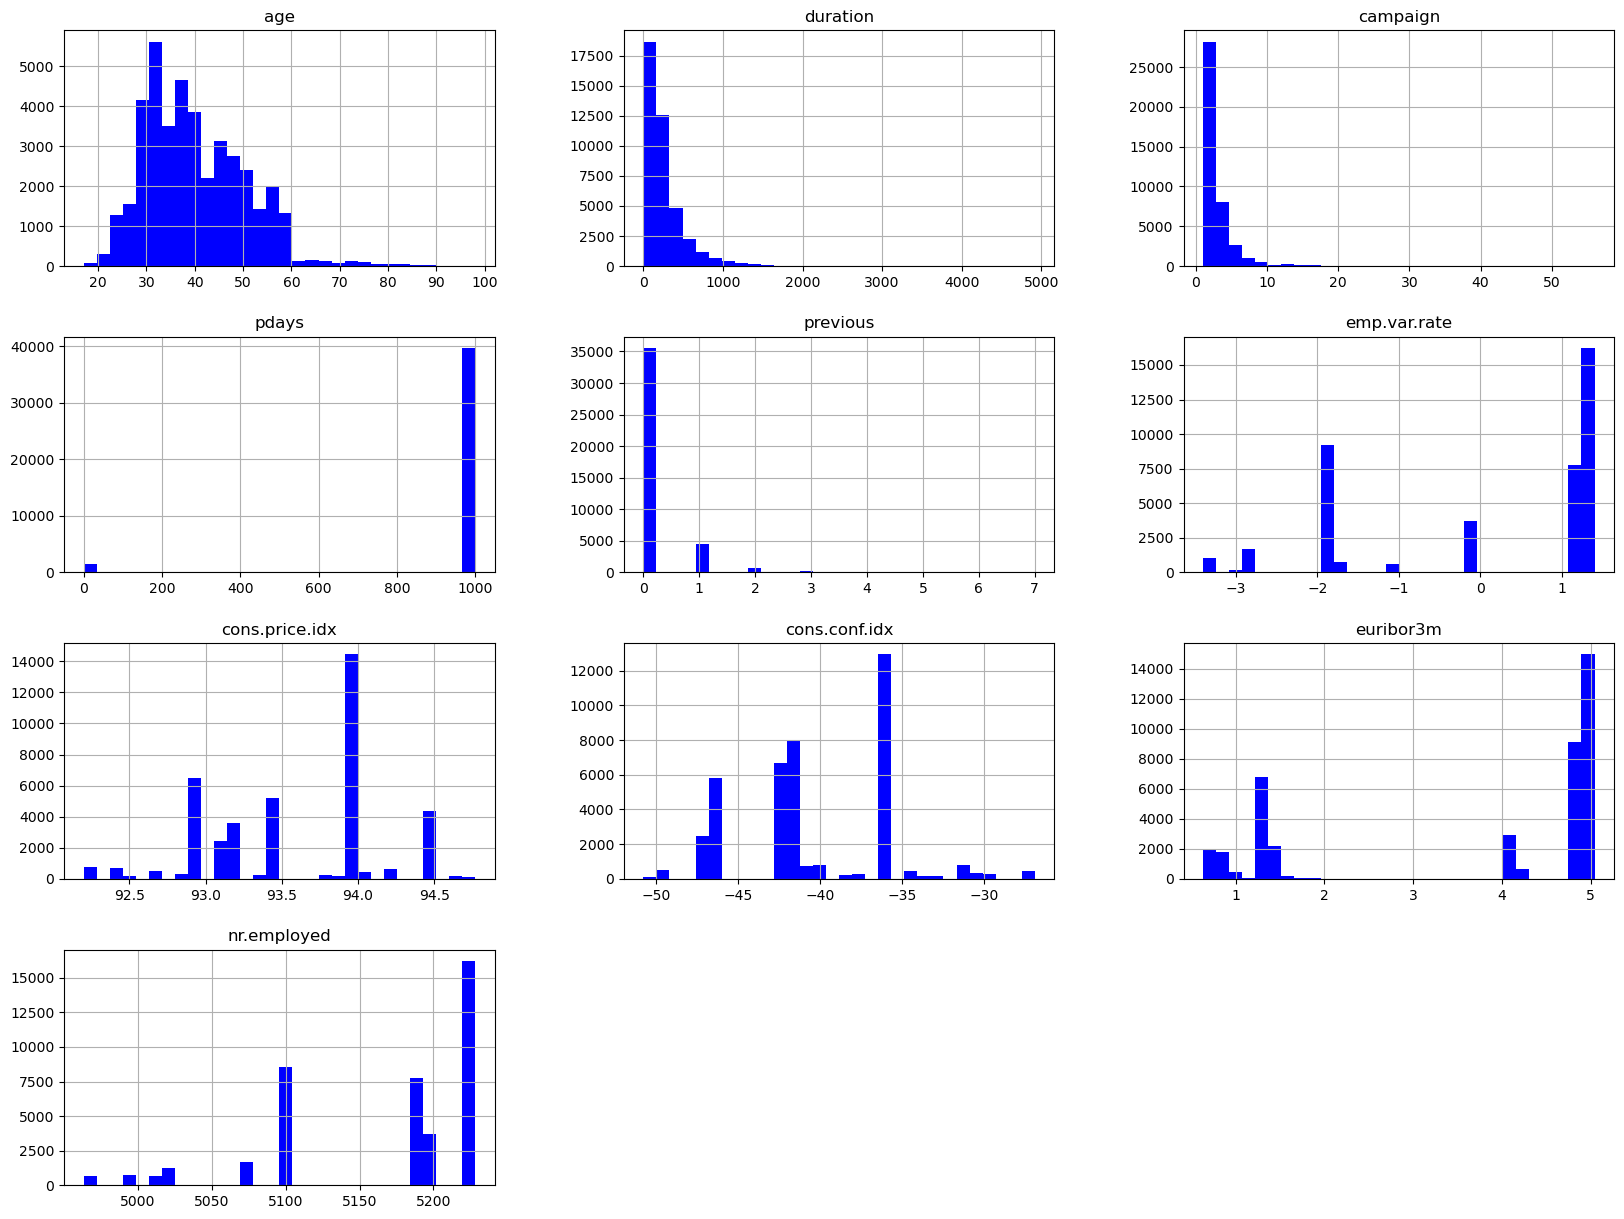

In [17]:
# Eksplorasi pada kolom yang bukan data kategori
data.hist(bins=30, figsize=(20,15), color='blue')
plt.show()

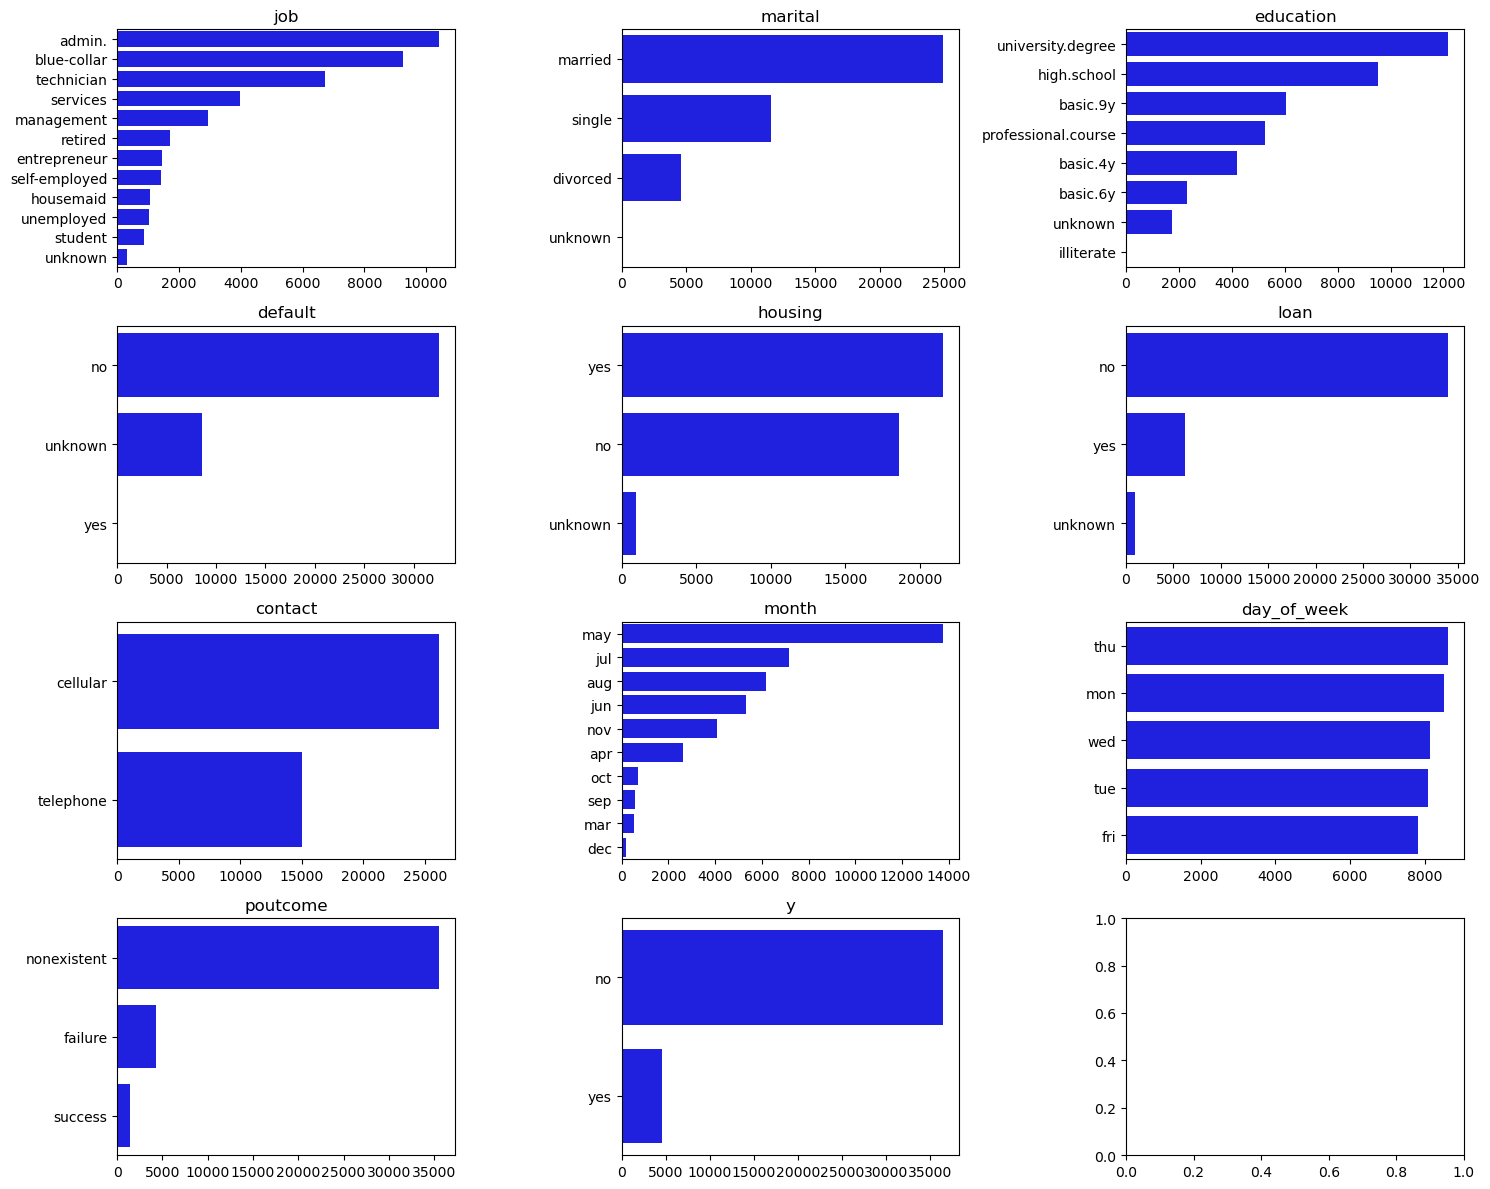

In [18]:
# Membuat subplots 4x3
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Iterasi melalui kolom kategori dan mengisi subplot
for i, col in enumerate(kategori):
    row, col_num = divmod(i, 3)  # Menghitung baris dan kolom subplot
    sns.barplot(x=data[col].value_counts().values, y=data[col].value_counts().index, color='blue', ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()


Dari visualisasi di atas diketahui bahwa kampanye pemasaran langsung (panggilan telepon) kepada nasabah yang :
* Job: sebagian besar berasal dari admin, blue-collar, dan technician dan yang terendah adalah student.
* Marital: kebanyakan dari yang ditawarkan sudah menikah.
* Education: sebagian besar nasabah memiliki tingkat pendidikan universitas. 
* Default/kredit: kebanyakan orang tidak memiliki catatan pembayaran yang buruk.
* Housing: Kebanyakan orang tidak memiliki pinjaman perumahan.
* Loan: Kebanyakan orang tidak memiliki pinjaman pribadi.
* Contact: metode kontak yang banyak digunakan adalah seluler daripada telepon.
* Month: Bulan May adalah bulan tersibuk dan Desember adalah bulan yang paling tidak sibuk.
* Day_of_week: Kamis adalah hari yang paling sibuk sedangkan Jumat adalah hari yang paling tidak sibuk dalam seminggu.
* Poutcome: Hasil dari pemasaran campaign sebelumnya paling banyak tidak ada dan paling sedikit yang berhasil.
* Y: Dari hasil penawaran tersebut nasabah banyak yang belum/tidak berlangganan deposito berjangka.

# Encode Data

In [19]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
# mengganti nilai data 'yes':1, 'no':0, 'unknown':np.nan
data.replace({'yes':1, 'no':0, 'unknown':np.nan}, inplace=True)

In [21]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [22]:
# Mengisi nilai yang hilang

for cat in kategori:
    imputer = SimpleImputer(strategy='most_frequent')
    data[kategori] = imputer.fit_transform(data[kategori]) # mengisi dengan nilai yang sering muncul

data[kategori] = data[kategori].astype('category')

In [23]:
#Menghitung jumlah missing value missing values pada data train
print('Jumlah missing values :', data.isna().sum().sum())

Jumlah missing values : 0


In [24]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [25]:
data.shape

(41176, 21)

In [26]:
# encode variabel kategori
label_encoder = LabelEncoder()
for cols in kategori:
    data[cols] = label_encoder.fit_transform(data[cols])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

# Defining Model

In [28]:
# Separating Independent and class variabels
X = data.iloc[:, :-1]
y = data['y']

# Split dataset ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=340)

# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cetak jumlah data pada masing-masing set
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)
print("Shape of X Train: ", X_train.shape)
print("Shape of Y Train: ", y_train.shape)
print("Shape of X Test: ", X_test.shape)
print("Shape of Y Test: ", y_test.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)
Shape of X Train:  (28823, 20)
Shape of Y Train:  (28823,)
Shape of X Test:  (12353, 20)
Shape of Y Test:  (12353,)


# Data Modeling

## Logistic Regression

In [29]:
#Membuat model logistic regression
logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
logreg.fit(X_train_scaled, y_train)

#Menguji dataset
X_test = scaler.transform(X_test_scaled)

#Memprediksi output
y_pred = logreg.predict(X_test_scaled)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10915
           1       0.72      0.27      0.40      1438

    accuracy                           0.90     12353
   macro avg       0.82      0.63      0.67     12353
weighted avg       0.89      0.90      0.88     12353



In [30]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[10762,   153],
       [ 1045,   393]], dtype=int64)

In [31]:
#Akurasi dari Logistic Regression
print('Akurasi untuk Logistic Regression:', logreg.score(X_train_scaled, y_train))
print('Akurasi untuk Logistic Regression:', logreg.score(X_test_scaled, y_test))

Akurasi untuk Logistic Regression: 0.9051798910592236
Akurasi untuk Logistic Regression: 0.9030195094309075


1. Precision:
* Precision untuk kelas 0 : 0.91. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 91% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.72. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 72% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.99. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 99% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.27. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, hanya 27% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.95. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.40. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 10,915.
* Jumlah sampel yang merupakan kelas 1 adalah 1,438.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.90, yang menunjukkan bahwa sekitar 90% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.82, rata-rata recall adalah 0.63, dan rata-rata F1-score adalah 0.67.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.89, rata-rata recall adalah 0.90, dan rata-rata F1-score adalah 0.88.

## K-Nearest Neighbors

In [32]:
# Inisialisasi model Decision Tree dan fit ke training set
knn = KNeighborsClassifier(n_neighbors=25)

# Train model menggunakan training sets
knn.fit(X_train_scaled, y_train)

# Membuat prediksi menggunakan testing set
y_pred_knn = knn.predict(X_test_scaled)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred_knn))




              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10915
           1       0.66      0.23      0.34      1438

    accuracy                           0.90     12353
   macro avg       0.78      0.61      0.64     12353
weighted avg       0.88      0.90      0.87     12353



In [33]:
#Confusion matrix
confusion_matrix(y_test, y_pred_knn)

array([[10744,   171],
       [ 1107,   331]], dtype=int64)

In [34]:
#Akurasi dari Clasifier correct
import sklearn.metrics as metrics
print('Akurasi untukClassifier:', metrics.accuracy_score(y_test, y_pred_knn))

Akurasi untukClassifier: 0.8965433497935724


1. Precision:
* Precision untuk kelas 0 : 0.91. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 91% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.66. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 66% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.98. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 98% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.23. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, hanya 23% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.94. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.34. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 10,915.
* Jumlah sampel yang merupakan kelas 1 adalah 1,438.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.90, yang menunjukkan bahwa sekitar 90% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.78, rata-rata recall adalah 0.61, dan rata-rata F1-score adalah 0.64.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.88, rata-rata recall adalah 0.90, dan rata-rata F1-score adalah 0.87.

## Deccision Tree Classifier

In [35]:
# Inisialisasi model Decision Tree dan fit ke training set
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=100)

# Train model menggunakan training sets
dt.fit(X_train_scaled, y_train)

# Membuat prediksi menggunakan testing set
y_pred_dt = dt.predict(X_test_scaled)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred_dt))




              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10915
           1       0.61      0.51      0.56      1438

    accuracy                           0.91     12353
   macro avg       0.78      0.74      0.75     12353
weighted avg       0.90      0.91      0.90     12353



In [36]:
#Confusion matrix
confusion_matrix(y_test, y_pred_dt)

array([[10451,   464],
       [  699,   739]], dtype=int64)

In [37]:
#Akurasi dari Decision Tree
import sklearn.metrics as metrics
print('Akurasi untuk Decision Tree:', metrics.accuracy_score(y_test, y_pred_dt))

Akurasi untuk Decision Tree: 0.9058528292722415


1. Precision:
* Precision untuk kelas 0 : 0.94. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 94% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.61. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 61% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.96. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 96% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.51. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, 51% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.95. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.56. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 10,915.
* Jumlah sampel yang merupakan kelas 1 adalah 1,438.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.91, yang menunjukkan bahwa sekitar 91% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.78, rata-rata recall adalah 0.74, dan rata-rata F1-score adalah 0.75.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.90, rata-rata recall adalah 0.91, dan rata-rata F1-score adalah 0.90.

## Support Vector Machine

In [38]:
# Inisialisasi model SVM
svm = svm.SVC(kernel = 'linear')

# Train model menggunakan training sets
svm.fit(X_train_scaled, y_train)

# Membuat prediksi menggunakan testing set
y_pred_svm = svm.predict(X_test_scaled)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred_svm))




              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10915
           1       0.65      0.29      0.40      1438

    accuracy                           0.90     12353
   macro avg       0.78      0.64      0.67     12353
weighted avg       0.88      0.90      0.88     12353



In [39]:
#Confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[10686,   229],
       [ 1016,   422]], dtype=int64)

In [40]:
#Akurasi dari Decision Tree
import sklearn.metrics as metrics
print('Akurasi untuk Support Vector Machine:', metrics.accuracy_score(y_test, y_pred_svm))

Akurasi untuk Support Vector Machine: 0.8992147656439731


1. Precision:
* Precision untuk kelas 0 : 0.91. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 91% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.65. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 65% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.98. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 98% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.29. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, hanya 29% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.94. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.40. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 10,915.
* Jumlah sampel yang merupakan kelas 1 adalah 1,438.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.90, yang menunjukkan bahwa sekitar 90% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.78, rata-rata recall adalah 0.64, dan rata-rata F1-score adalah 0.67.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.88, rata-rata recall adalah 0.90, dan rata-rata F1-score adalah 0.88.

## Random Forest Classifier

In [41]:
# Inisialisasi model RFC
rfc = RandomForestClassifier(n_estimators = 100)

# Train model menggunakan training sets
rfc.fit(X_train_scaled, y_train)

# Membuat prediksi menggunakan testing set
y_pred_rfc = rfc.predict(X_test_scaled)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred_rfc))




              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10915
           1       0.66      0.52      0.58      1438

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.77     12353
weighted avg       0.91      0.91      0.91     12353



In [42]:
#Confusion matrix
confusion_matrix(y_test, y_pred_rfc)

array([[10523,   392],
       [  692,   746]], dtype=int64)

In [43]:
#Akurasi dari Decision Tree
import sklearn.metrics as metrics
print('Akurasi Random Forest Classifier:', metrics.accuracy_score(y_test, y_pred_rfc))

Akurasi Random Forest Classifier: 0.9122480369141099


1. Precision:
* Precision untuk kelas 0 : 0.94. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 94% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.65. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 65% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.96. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 96% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.53. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, 53% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.95. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.58. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 10,915.
* Jumlah sampel yang merupakan kelas 1 adalah 1,438.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.91, yang menunjukkan bahwa sekitar 91% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.79, rata-rata recall adalah 0.74, dan rata-rata F1-score adalah 0.77.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.91, rata-rata recall adalah 0.91, dan rata-rata F1-score adalah 0.91.


## Naive Bayes

In [44]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train model menggunakan training sets
gnb.fit(X_train_scaled, y_train)

# Membuat prediksi menggunakan testing set
y_pred_gnb = gnb.predict(X_test_scaled)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred_gnb))




              precision    recall  f1-score   support

           0       0.98      0.68      0.80     10915
           1       0.27      0.89      0.41      1438

    accuracy                           0.70     12353
   macro avg       0.62      0.78      0.60     12353
weighted avg       0.90      0.70      0.75     12353



In [45]:
#Confusion matrix
confusion_matrix(y_test, y_pred_gnb)

array([[7392, 3523],
       [ 161, 1277]], dtype=int64)

In [46]:
#Akurasi dari Decision Tree
import sklearn.metrics as metrics
print('Akurasi Naive Bayes:', metrics.accuracy_score(y_test, y_pred_gnb))

Akurasi Naive Bayes: 0.7017728487007204


1. Precision:
* Precision untuk kelas 0 : 0.98. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 98% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.27. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, hanya 27% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.68. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, hanya 68% yang berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.89. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, 89% berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.80. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.41. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 10,915.
* Jumlah sampel yang merupakan kelas 1 adalah 1,438.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.70, yang menunjukkan bahwa sekitar 70% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.62, rata-rata recall adalah 0.78, dan rata-rata F1-score adalah 0.60.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.90, rata-rata recall adalah 0.70, dan rata-rata F1-score adalah 0.75.

# Kesimpulan

Dari hasil analisis di atas, dapat ditarik kesimpulan bahwa:
1.  Hanya 13% atau sebanyak 4,640 nasabah yang menjadi nasabah pada bank tersebut untuk berlangganan deposito sedangkan sebanyak 88.7% atau 36,548 nasabah memilih tidak berlangganan deposito pada bank tersebut. 
2. Model Random forrest menunjukkan kinerja terbaik dengan akurasi tertinggi 91.4%, 
3. Model Random forrest menunjukkan kinerja terbaik dengan akurasi tertinggi 91%, Precision 0.65 menunjukkan kemampuan model mengidentifikasi data positif dengan benar, sedangkan Recall 0.53 menunjukkan kemampuan model menemukan kembali data positif yang sebenarnya. F1-score sebesar 0.58 mencerminkan keseimbangan antara precision dan recall. Random forrest juga unggul dalam perbandingan dengan model lain seperti Regresi Logistik, KNN, Naive Bayes, SVM, dan Decission Tree.